Inicio de Simulacion 30 anios con 250 dias habiles cada uno
	Promedios con Stock minimo 50 -> Turnos=23 Costo Mantenimiento=511362.00


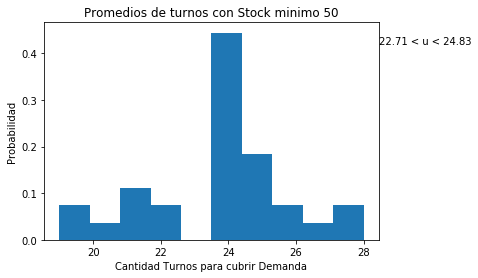

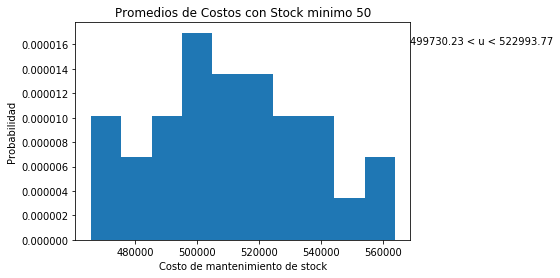

	Promedios con Stock minimo 60 -> Turnos=22 Costo Mantenimiento=567033.33


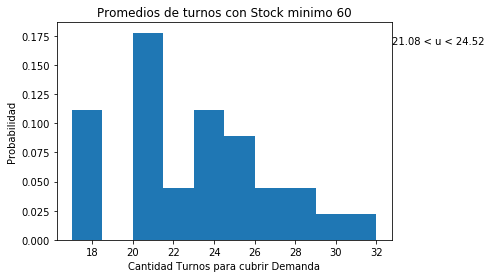

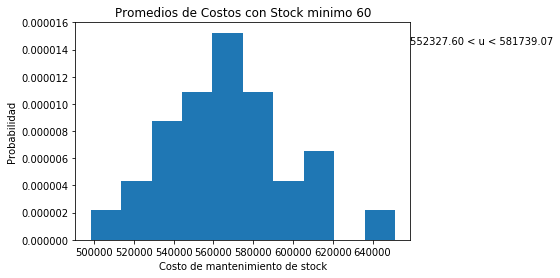

	Promedios con Stock minimo 70 -> Turnos=25 Costo Mantenimiento=602205.33


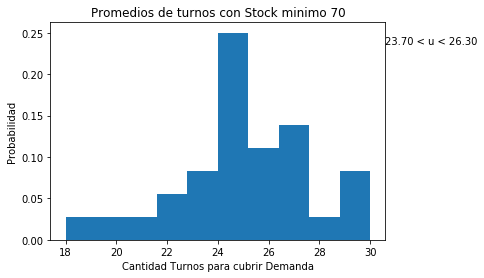

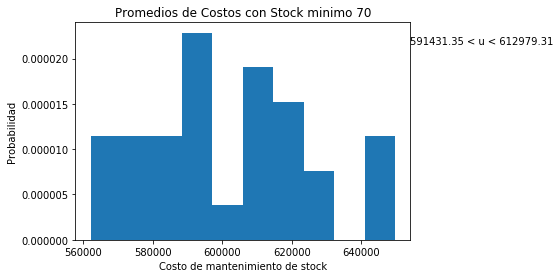

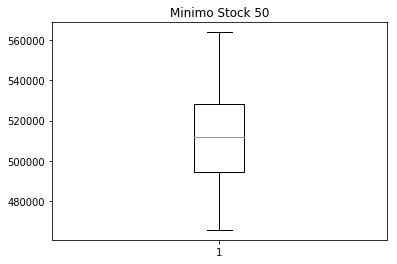

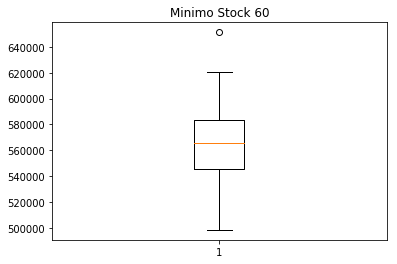

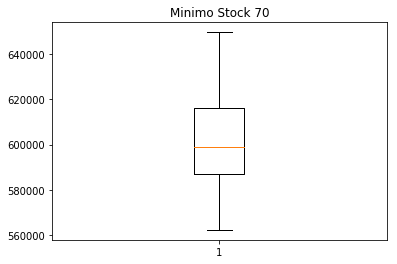

 ***** REPUESTA AL OBJETIVO DEL SISTEMA *****
Promedios con Stock minimo 50 
	Turno = 23.77 con 22.71 < u < 24.83 con 99% de Confianza
	Costo = 511362.00 con 499730.23 < u < 522993.77 con 99% de Confianza
Promedios con Stock minimo 60 
	Turno = 22.80 con 21.08 < u < 24.52 con 99% de Confianza
	Costo = 567033.33 con 552327.60 < u < 581739.07 con 99% de Confianza
Promedios con Stock minimo 70 
	Turno = 25.00 con 23.70 < u < 26.30 con 99% de Confianza
	Costo = 602205.33 con 591431.35 < u < 612979.31 con 99% de Confianza


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
#import scipy.stats as stats
CANT_ANIOS = 30
DIAS_DEL_ANIO = 250

VALOR_Z = 2.57 # para 99 % de confianza
PRODUCCION = {
    'cantidad_turnos':1,
    'por_turno': 100,
    'por_turno_doble': 200
}
DEMANDA_DIARIA = {
    'funcion':np.random.normal,
    'parametros': {'loc':110, 'scale':20} # loc media   scae desvio
}
INVENTARIO = {
    'minimo':[50, 60, 70],
    'costo_por_unidad': 20,
    'stock_inicial':80
}

def simulacion(minimo):
    turnos_total = []
    costo_unidad_total = []    
    for i in range(CANT_ANIOS):
        turnos_total.append(0)  #contador arranca en 0
        costo_unidad_total.append(INVENTARIO['stock_inicial'] * INVENTARIO['costo_por_unidad'])
        inventario_inicial = INVENTARIO['stock_inicial']
        for y in range(DIAS_DEL_ANIO):
            demanda_aleatoria = int(DEMANDA_DIARIA['funcion'](**DEMANDA_DIARIA['parametros']))
            if inventario_inicial < minimo:
                turnos_total[i] += 1
                inventario_inicial += PRODUCCION['por_turno_doble'] 
            else:
                inventario_inicial += PRODUCCION['por_turno']
            inventario_inicial -= demanda_aleatoria        
            costo_unidad_total[i] += inventario_inicial * INVENTARIO['costo_por_unidad']
    return turnos_total, costo_unidad_total

def printear(muestras_de_un_minimo):
    minimo, (muestra_turno, muestra_costo) = muestras_de_un_minimo.items()[0]
    promedio_t, inf_t, sup_t = getPromedioEstimado(muestra_turno)
    promedio_c, inf_c, sup_c = getPromedioEstimado(muestra_costo)
    print "Promedios con Stock minimo %d "%(minimo)
    print "\tTurno = %.2f con %.2f < u < %.2f con 99%% de Confianza"%(promedio_t, inf_t, sup_t)
    print "\tCosto = %.2f con %.2f < u < %.2f con 99%% de Confianza"%(promedio_c, inf_c, sup_c)
    
# calculamos promedio como estimador puntual 
def getPromedioEstimado(promedios):
    desvio = np.std(promedios)
    promedio = np.average(promedios)
    inferior = promedio - (desvio * VALOR_Z / math.sqrt(len(promedios)))
    superior = promedio + (desvio * VALOR_Z / math.sqrt(len(promedios)))
    return promedio, inferior, superior

def graficarHistograma(title, datos, xlabel, ylabel, texto):    
    plt.clf()
    plt.hist(datos, 10, normed=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # calculamos la posicion fija del texto. HABRIA QUE SACARLO y mostrar esto en otro lugar
    x0, xmax = plt.xlim()
    y0, ymax = plt.ylim()
    data_width = xmax - x0
    data_height = ymax - y0
    plt.text(x0 + data_width * 1, y0 + data_height *0.9, texto)
    plt.show()

def graficarCajaYBigotes(datos, title):
    plt.clf()   
    plt.title(title)
    plt.boxplot(datos)
    plt.show()
    
def mostrarHistogramas(muestras_de_un_minimo):
    minimo, (muestra_turnos, muestra_costos) = muestras_de_un_minimo.items()[0]
    # promedios de turnos
    promedio_t, inf_t, sup_t = getPromedioEstimado(muestra_turnos)
    # promedios de costos
    promedio_c, inf_c, sup_c = getPromedioEstimado(muestra_costos)
    # ahora a mostrar historigrama
    print "\tPromedios con Stock minimo %d -> Turnos=%d Costo Mantenimiento=%.2f"%(minimo, promedio_t, promedio_c)

    texto = "%.2f < u < %.2f"%(inf_t, sup_t)
    parametros = {'title':'Promedios de turnos con Stock minimo %d'%(minimo),
                  'datos': muestra_turnos,
                  'xlabel':'Cantidad Turnos para cubrir Demanda',
                  'ylabel':'Probabilidad',                
                  'texto': texto
                 }
    graficarHistograma(**parametros)
    texto = "%.2f < u < %.2f"%(inf_c, sup_c)
    parametros = {'title':'Promedios de Costos con Stock minimo %d'%(minimo),
                  'datos': muestra_costos,
                  'xlabel':'Costo de mantenimiento de stock',
                  'ylabel':'Probabilidad',                
                  'texto': texto
                 }
    graficarHistograma(**parametros)
    
def mostrarCajaYBigotes(muestras_de_un_minimo):
    minimo, (_, muestra_costo) = muestras_de_un_minimo.items()[0]
    parametros = {
        'title':"Minimo Stock %d"%(minimo),
        'datos':muestra_costo
    }
    graficarCajaYBigotes(**parametros)
    
def main():
    print "Inicio de Simulacion %d anios con %d dias habiles cada uno" %(CANT_ANIOS, DIAS_DEL_ANIO)
    #result = [{min: (muestra_turnos, muestra_costo)} ... ]
    results = [{minimo: simulacion(minimo)} for minimo in INVENTARIO['minimo']]
    #mostramos histogramas junto con promedio puntual para cada muestra [turnos, costo]
    for result in results: mostrarHistogramas(result)
    # mostramos caja y bigotes para presupuesto costo anual.
    for result in results: mostrarCajaYBigotes(result)
    # mostrar ANOVA para ver si existe diferencia significativa.
    # HACER
    # Printeamos todo como conclusion para responder al objetivo
    print " ***** REPUESTA AL OBJETIVO DEL SISTEMA *****"
    for result in results: printear(result)
if __name__ == '__main__':
    main() 
        